# Exploration of the DBN collected dataset

## Import

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# data handling
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100

In [ ]:
# error
import traceback
from collections import defaultdict
from datetime import time, timedelta, datetime

## Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Xcale master 2/Notebook/srl-dataset.csv", header=0, index_col=0)

In [ ]:
df

,Already_used_QuickPi,Already_progammed,Home_or_School,Extern_Help_frequence,Reason,Motivation,Goal_Reach_middle,Time_Management_middle,Goal_Type,Help_Module_explored_middle,Sujet_Explored_middle,Mouse_Hover_editor_middle,Mouse_Hover_grid_middle,Mouse_Hover_task_middle,Mouse_Hover_controls_middle,Sujet_20_Version_2_middle,nb_validation_20_2_middle,nb_experimentation_20_2_middle,nb_modification_20_2_middle,nb_pasapas_20_2_middle,nb_help_20_2_middle,time_spent_help_20_2_middle,time_spent_20_2_middle,Sujet_20_Version_3_middle,nb_validation_20_3_middle,nb_experimentation_20_3_middle,nb_modification_20_3_middle,nb_pasapas_20_3_middle,nb_help_20_3_middle,time_spent_help_20_3_middle,time_spent_20_3_middle,Sujet_20_Version_4_middle,nb_validation_20_4_middle,nb_experimentation_20_4_middle,nb_modification_20_4_middle,nb_pasapas_20_4_middle,nb_help_20_4_middle,time_spent_help_20_4_middle,time_spent_20_4_middle,completness_20_middle,...,nb_experimentation_27_3_final,nb_modification_27_3_final,nb_pasapas_27_3_final,nb_help_27_3_final,time_spent_help_27_3_final,time_spent_27_3_final,Sujet_27_Version_4_final,nb_validation_27_4_final,nb_experimentation_27_4_final,nb_modification_27_4_final,nb_pasapas_27_4_final,nb_help_27_4_final,time_spent_help_27_4_final,time_spent_27_4_final,completness_27_final,Sujet_28_Version_2_final,nb_validation_28_2_final,nb_experimentation_28_2_final,nb_modification_28_2_final,nb_pasapas_28_2_final,nb_help_28_2_final,time_spent_help_28_2_final,time_spent_28_2_final,Sujet_28_Version_3_final,nb_validation_28_3_final,nb_experimentation_28_3_final,nb_modification_28_3_final,nb_pasapas_28_3_final,nb_help_28_3_final,time_spent_help_28_3_final,time_spent_28_3_final,Sujet_28_Version_4_final,nb_validation_28_4_final,nb_experimentation_28_4_final,nb_modification_28_4_final,nb_pasapas_28_4_final,nb_help_28_4_final,time_spent_help_28_4_final,time_spent_28_4_final,completness_28_final
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0,0,0,0,0,0,0,4,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,4,0,0,0 days 00:00:00,0 days 00:00:02,0.000000,...,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,4,0,0,0 days 00:00:00,0 days 00:00:05,0.000000,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0.0
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,0,0,0,0,0,0,6,27,7,3,0 days 00:01:00,0 days 00:07:05,0,0,4,21,4,0,0 days 00:00:00,0 days 00:02:20,0,0,6,67,6,0,0 days 00:00:00,0 days 00:05:13,0.000000,...,0,3,0,0,0 days 00:00:00,0 days 00:00:01,0,0,0,3,0,0,0 days 00:00:00,0 days 00:00:01,0.000000,0,0,1,44,1,0,0 days 00:00:00,0 days 00:01:52,0,0,0,7,0,0,0 days 00:00:00,0 days 00:00:04,0,0,0,3,0,0,0 days 00:00:00,0 days 00:00:02,0.0
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,0,0,0,0,0,0,6,26,6,3,0 days 00:00:45,0 days 00:03:04,1,2,1,20,3,0,0 days 00:00:00,0 days 00:01:55,1,1,0,53,1,0,0 days 00:00:00,0 days 00:02:17,1.000000,...,0,63,3,0,0 days 00:00:00,0 days 00:03:39,0,0,0,7,0,0,0 days 00:00:00,0 days 00:18:05,0.666667,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0.0
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,0,0,0,1,1,4,17,5,1,0 days 00:00:10,0 days 00:01:38,1,1,3,17,4,0,0 days 00:00:00,0 days 00:01:39,1,7,1,104,11,0,0 days 00:00:00,0 days 00:05:59,1.000000,...,0,3,0,0,0 days 00:00:00,0 days 00:00:01,0,0,0,3,0,0,0 days 00:00:00,0 days 00:00:06,0.000000,0,4,0,48,7,0,0 days 00:00:00,0 days 00:04:08,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0.0
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0.000000,...,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,8,0,0,0 days 00:00:00,0 days 00:01:26,0.000000,0,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0,0,0,0,0,0,0 days 00:00:00,0 da

In [ ]:
df_indicators = df.describe()
df_indicators

,Already_used_QuickPi,Already_progammed,Extern_Help_frequence,Help_Module_explored_middle,Sujet_Explored_middle,Mouse_Hover_editor_middle,Mouse_Hover_grid_middle,Mouse_Hover_task_middle,Mouse_Hover_controls_middle,Sujet_20_Version_2_middle,nb_validation_20_2_middle,nb_experimentation_20_2_middle,nb_modification_20_2_middle,nb_pasapas_20_2_middle,nb_help_20_2_middle,Sujet_20_Version_3_middle,nb_validation_20_3_middle,nb_experimentation_20_3_middle,nb_modification_20_3_middle,nb_pasapas_20_3_middle,nb_help_20_3_middle,Sujet_20_Version_4_middle,nb_validation_20_4_middle,nb_experimentation_20_4_middle,nb_modification_20_4_middle,nb_pasapas_20_4_middle,nb_help_20_4_middle,completness_20_middle,Sujet_21_Version_2_middle,nb_validation_21_2_middle,nb_experimentation_21_2_middle,nb_modification_21_2_middle,nb_pasapas_21_2_middle,nb_help_21_2_middle,Sujet_21_Version_3_middle,nb_validation_21_3_middle,nb_experimentation_21_3_middle,nb_modification_21_3_middle,nb_pasapas_21_3_middle,nb_help_21_3_middle,...,nb_help_26_4_final,completness_26_final,Sujet_27_Version_2_final,nb_validation_27_2_final,nb_experimentation_27_2_final,nb_modification_27_2_final,nb_pasapas_27_2_final,nb_help_27_2_final,Sujet_27_Version_3_final,nb_validation_27_3_final,nb_experimentation_27_3_final,nb_modification_27_3_final,nb_pasapas_27_3_final,nb_help_27_3_final,Sujet_27_Version_4_final,nb_validation_27_4_final,nb_experimentation_27_4_final,nb_modification_27_4_final,nb_pasapas_27_4_final,nb_help_27_4_final,completness_27_final,Sujet_28_Version_2_final,nb_validation_28_2_final,nb_experimentation_28_2_final,nb_modification_28_2_final,nb_pasapas_28_2_final,nb_help_28_2_final,Sujet_28_Version_3_final,nb_validation_28_3_final,nb_experimentation_28_3_final,nb_modification_28_3_final,nb_pasapas_28_3_final,nb_help_28_3_final,Sujet_28_Version_4_final,nb_validation_28_4_final,nb_experimentation_28_4_final,nb_modification_28_4_final,nb_pasapas_28_4_final,nb_help_28_4_final,completness_28_final
count,3.000000,3.000000,3.000000,91.000000,91.000000,91.0,91.0,91.0,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,...,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000
mean,0.666667,1.333333,2.666667,0.318681,4.065934,0.0,0.0,0.0,0.0,0.318681,0.329670,1.395604,5.736264,1.769231,0.318681,0.230769,0.362637,0.67033,5.571429,1.142857,0.032967,0.318681,0.890110,0.329670,23.978022,1.329670,0.0,0.369963,0.285714,1.087912,0.527473,15.395604,1.736264,0.021978,0.098901,1.230769,0.164835,13.978022,1.549451,0.0,...,0.0,0.054945,0.032967,0.648352,0.054945,8.791209,0.703297,0.010989,0.098901,0.263736,0.043956,7.450549,0.329670,0.0,0.010989,0.846154,0.010989,11.582418,0.890110,0.0,0.073260,0.120879,0.252747,0.142857,6.307692,0.439560,0.010989,0.065934,0.516484,0.318681,7.439560,0.846154,0.010989,0.043956,0.219780,0.076923,6.549451,0.296703,0.0,0.095238
std,0.577350,0.577350,1.154701,0.468547,2.365503,0.0,0.0,0.0,0.0,0.468547,0.495646,3.690466,6.497581,3.838625,0.867680,0.423659,0.925160,2.65855,10.309804,3.554563,0.179540,0.468547,1.923253,0.919601,36.569866,2.883112,0.0,0.453928,0.454257,2.411308,1.558779,21.209997,3.794251,0.209657,0.300183,5.762092,0.563003,39.358178,6.360055,0.0,...,0.0,0.159193,0.179540,2.509421,0.273359,25.979272,2.575502,0.104828,0.300183,0.814250,0.206133,20.151241,0.966724,0.0,0.104828,3.991444,0.104828,45.347318,4.214922,0.0,0.215465,0.327793,0.739270,0.528550,14.576764,1.284167,0.104828,0.249542,

## Functions

In [ ]:
sujet_range = list(range(20,29))
columns = list(df_indicators.columns)

In [ ]:
def get_columns_indicator(df_indicators, indicator, beg=9):
  y = []
  for i,sujet in enumerate(sujet_range):
    y.append([])
    for j,version in enumerate([2,3,4]):
      y[i].append(df_indicators.loc[indicator, columns[beg + i * 19 + j * 6]])
  return y

In [ ]:
def plotify(labels, y, xlabel, ylabel, title, y_error=None):
  width = 0.2
  x = list(range(len(sujet_range)))

  ax = plt.subplot(111)
  if y_error == None:
    ax.bar([elem-width for elem in x], [elem[0] for elem in y], width=width, color='powderblue', align='center')
    ax.bar(x, [elem[1] for elem in y], width=width, color='slateblue', align='center')
    ax.bar([elem+width for elem in x], [elem[2] for elem in y], width=width, color='crimson', align='center')
  else:
    ax.bar([elem-width for elem in x], [elem[0] for elem in y], yerr=[elem[0] for elem in y_error], width=width, color='powderblue', align='center')
    ax.bar(x, [elem[1] for elem in y], yerr=[elem[1] for elem in y_error], width=width, color='slateblue', align='center')
    ax.bar([elem+width for elem in x], [elem[2] for elem in y], yerr=[elem[2] for elem in y_error], width=width, color='crimson', align='center')
  ax.set_xticks(x)
  ax.set_xticklabels(["sujet {}".format(i) for i in sujet_range])
  plt.xticks(rotation=90)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  colors = {'version 2':'powderblue', 'version 3':'slateblue', 'version 4':'crimson'}         
  labels = list(colors.keys())
  handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
  ax.legend(handles, labels)

  plt.show()

## Visualization

In [ ]:
print("Number of valid connection : {}".format(df.shape[0]))

Number of valid connection : 91


### Completed

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 9)
y2 = get_columns_indicator(df_indicators, "mean", 189)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

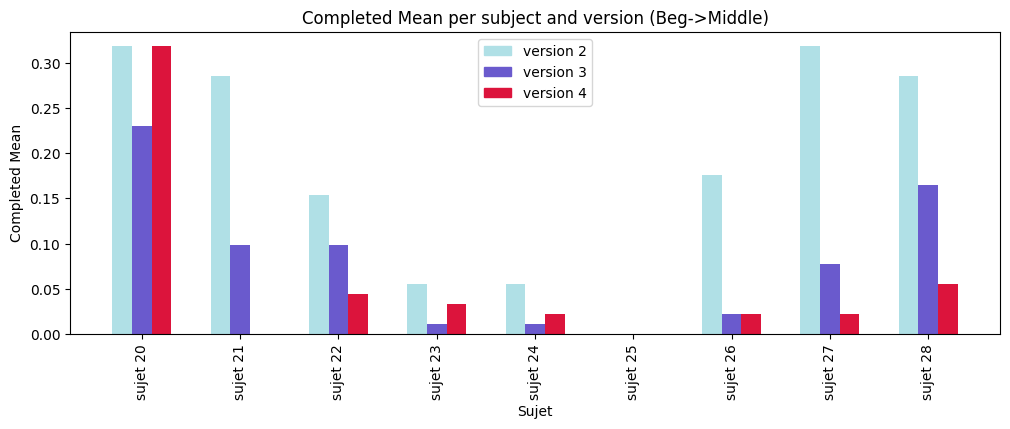

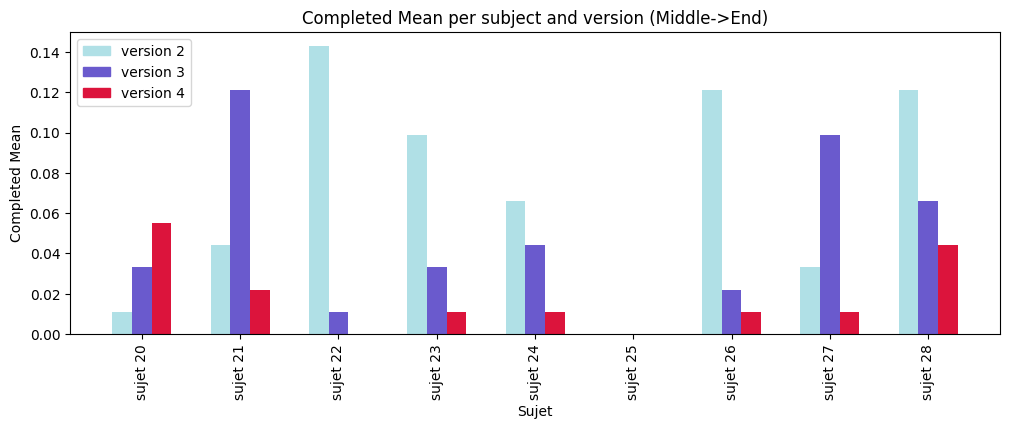

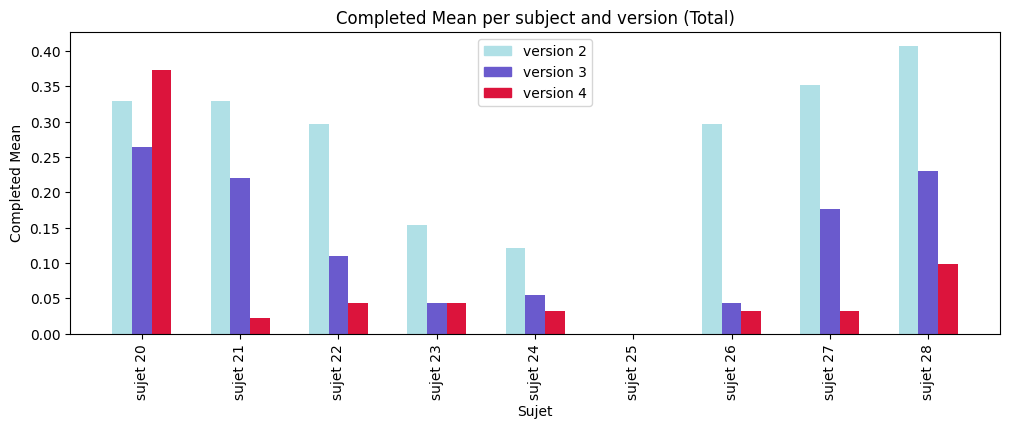

In [ ]:
plotify(sujet_range, y1, "Sujet", "Completed Mean", "Completed Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Completed Mean", "Completed Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Completed Mean", "Completed Mean per subject and version (Total)")

#### Count

In [ ]:
beg = 9
y1 = []
for i,sujet in enumerate(sujet_range):
  y1.append([])
  for j,version in enumerate([2,3,4]):
    col = columns[beg + i * 19 + j * 6]
    y1[i].append(df[col][df[col] == 1].shape[0])
beg = 189
y2 = []
for i,sujet in enumerate(sujet_range):
  y2.append([])
  for j,version in enumerate([2,3,4]):
    col = columns[beg + i * 19 + j * 6]
    y2[i].append(df[col][df[col] == 1].shape[0])
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

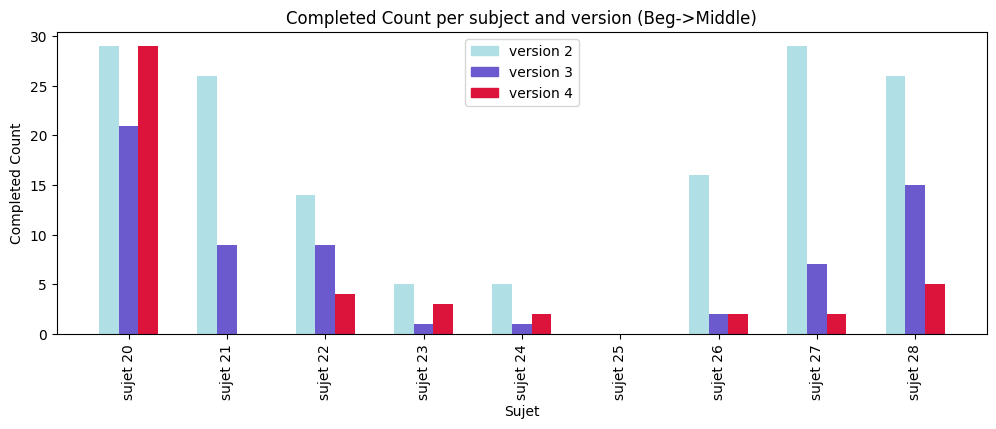

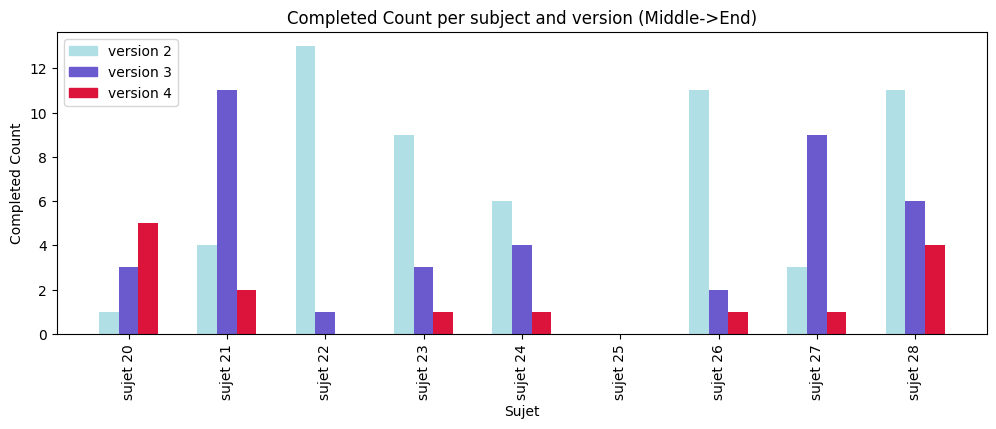

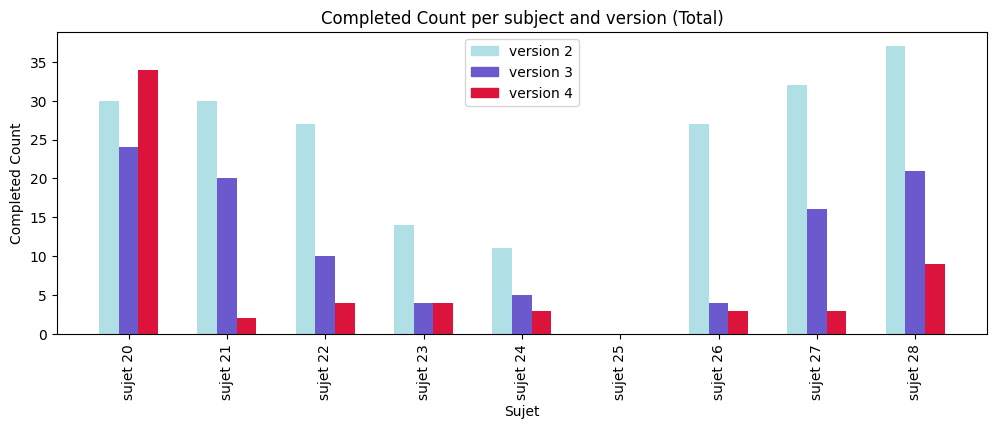

In [ ]:
plotify(sujet_range, y1, "Sujet", "Completed Count", "Completed Count per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Completed Count", "Completed Count per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Completed Count", "Completed Count per subject and version (Total)")

### Validation

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 10)
y2 = get_columns_indicator(df_indicators, "mean", 190)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

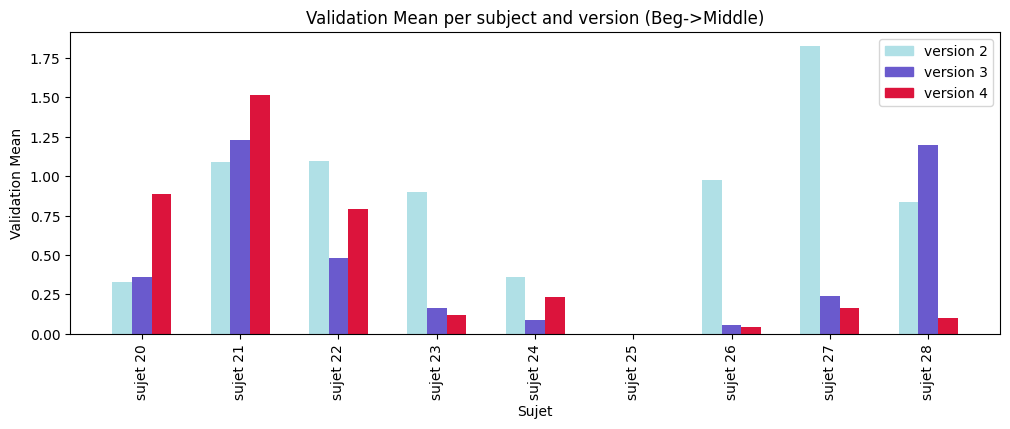

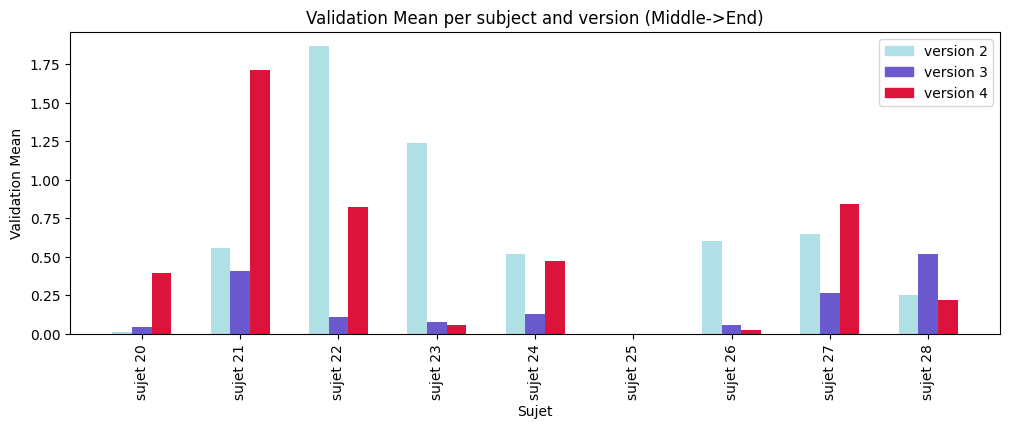

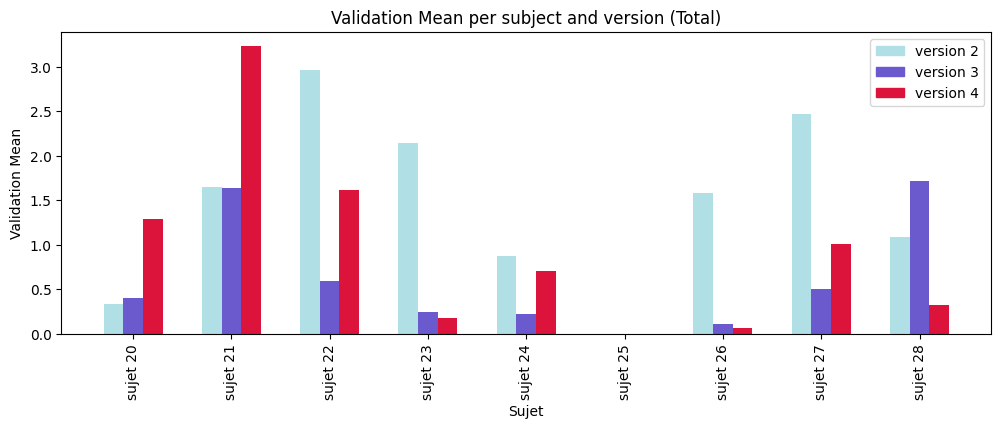

In [ ]:
plotify(sujet_range, y1, "Sujet", "Validation Mean", "Validation Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Validation Mean", "Validation Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Validation Mean", "Validation Mean per subject and version (Total)")

#### std

In [ ]:
y1 = get_columns_indicator(df_indicators, "std", 10)
y2 = get_columns_indicator(df_indicators, "std", 190)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

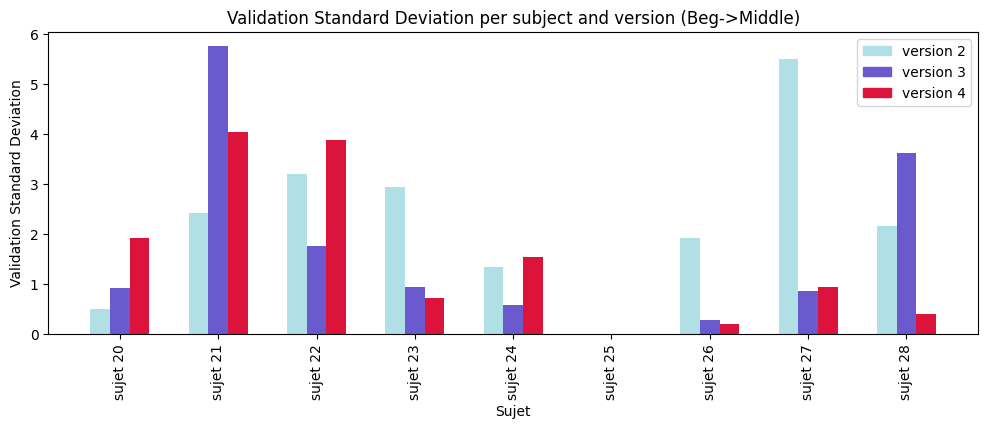

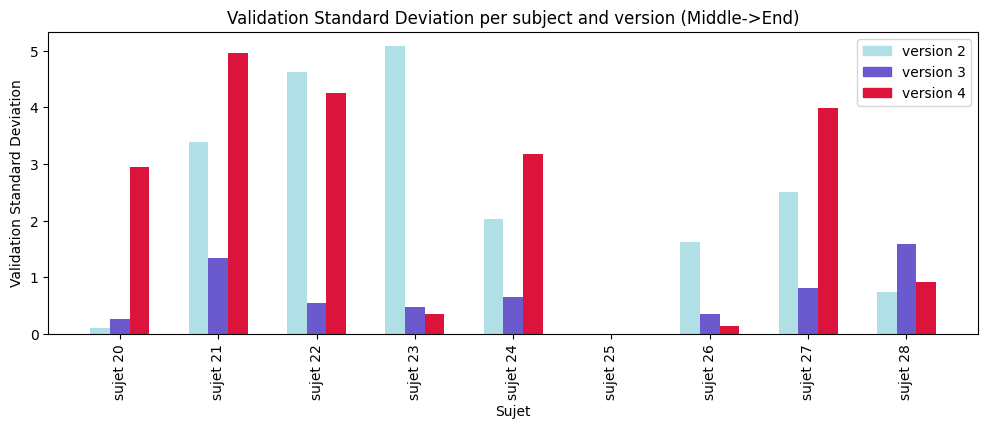

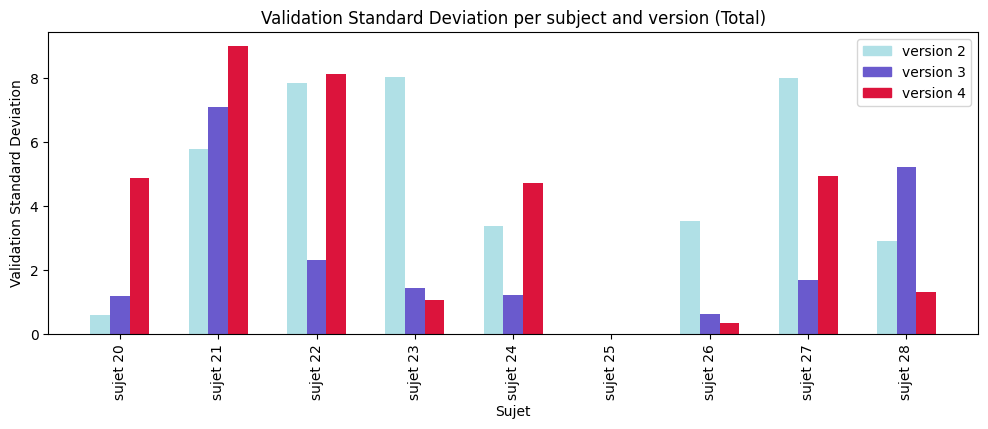

In [ ]:
plotify(sujet_range, y1, "Sujet", "Validation Standard Deviation", "Validation Standard Deviation per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Validation Standard Deviation", "Validation Standard Deviation per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Validation Standard Deviation", "Validation Standard Deviation per subject and version (Total)")

### Experimentation

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 11)
y2 = get_columns_indicator(df_indicators, "mean", 191)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

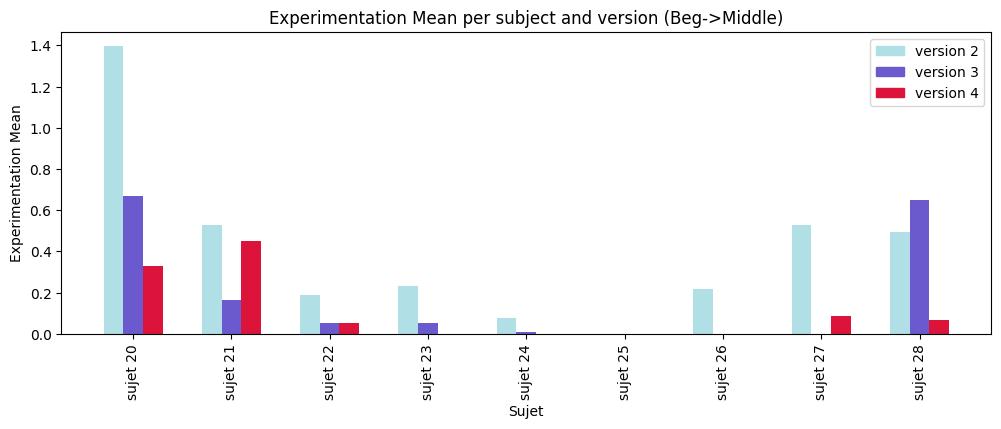

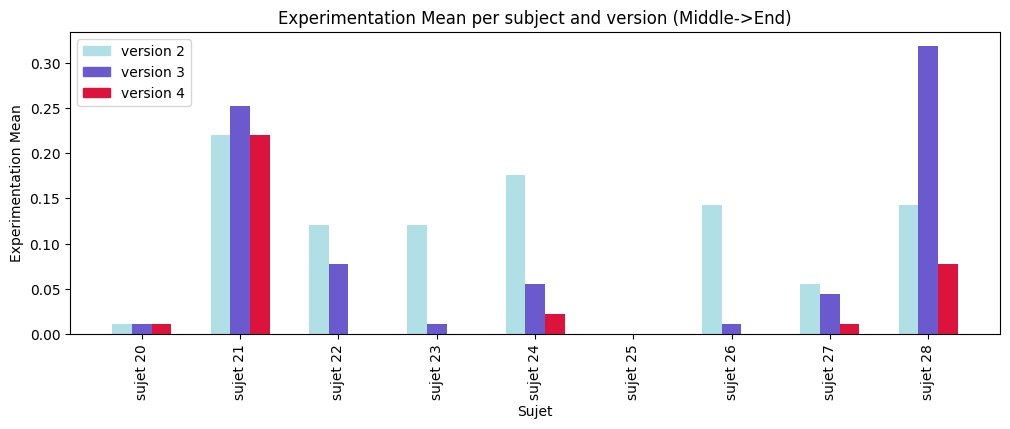

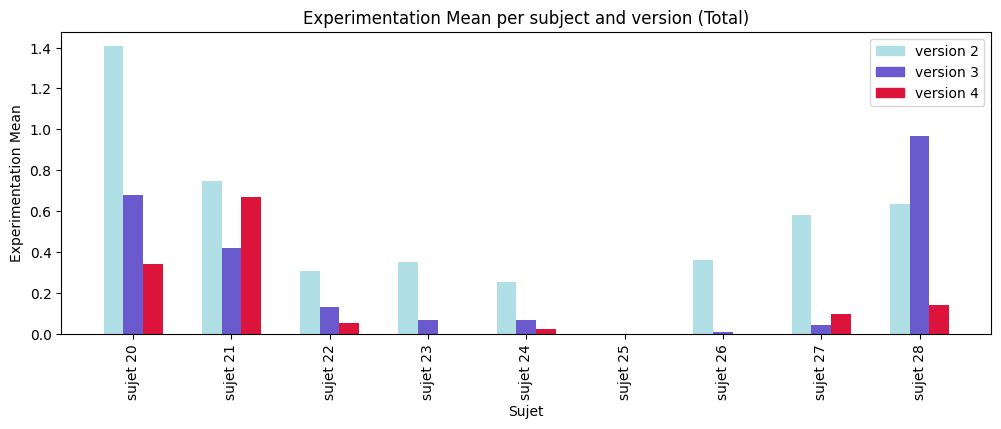

In [ ]:
plotify(sujet_range, y1, "Sujet", "Experimentation Mean", "Experimentation Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Experimentation Mean", "Experimentation Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Experimentation Mean", "Experimentation Mean per subject and version (Total)")

#### Std

In [ ]:
y1 = get_columns_indicator(df_indicators, "std", 11)
y2 = get_columns_indicator(df_indicators, "std", 191)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

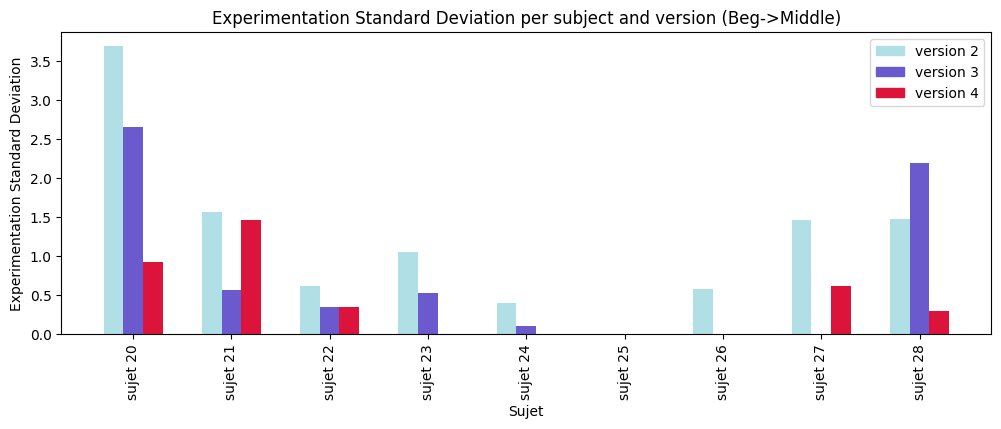

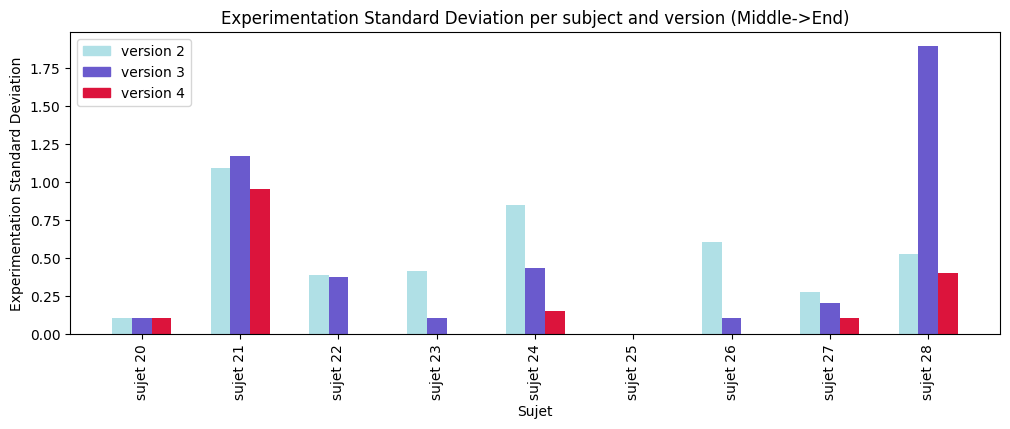

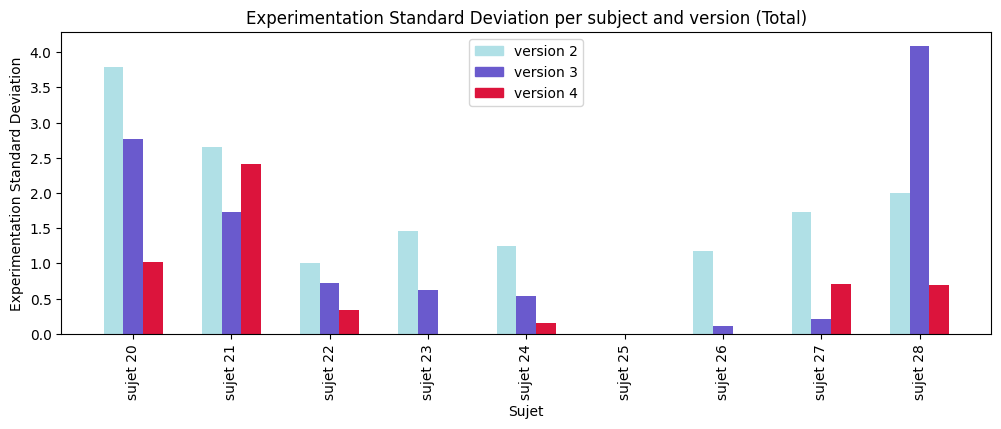

In [ ]:
plotify(sujet_range, y1, "Sujet", "Experimentation Standard Deviation", "Experimentation Standard Deviation per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Experimentation Standard Deviation", "Experimentation Standard Deviation per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Experimentation Standard Deviation", "Experimentation Standard Deviation per subject and version (Total)")

### Modification

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 12)
y2 = get_columns_indicator(df_indicators, "mean", 192)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

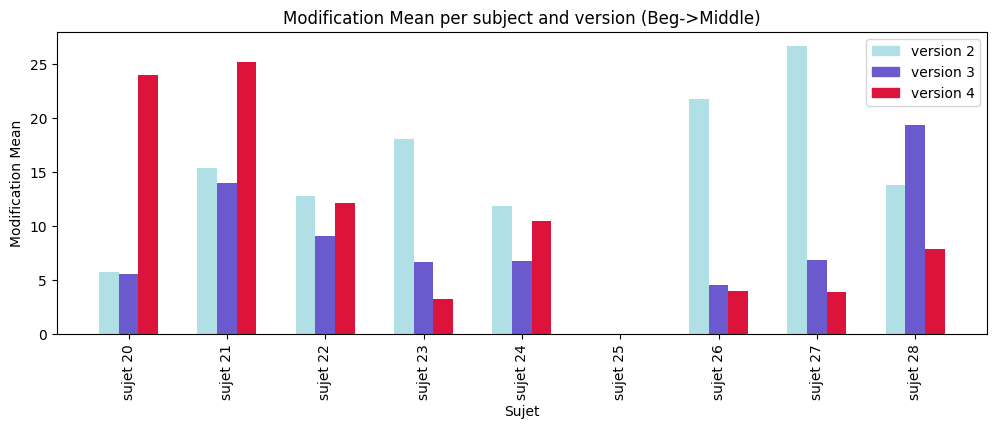

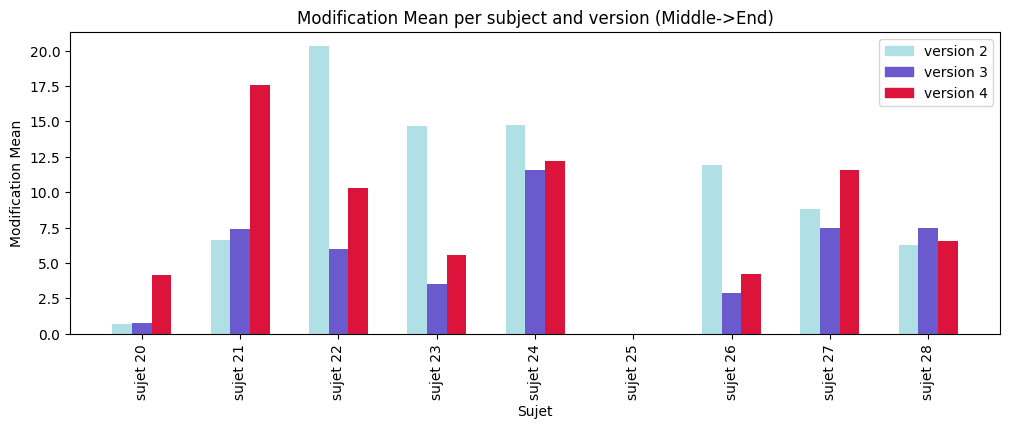

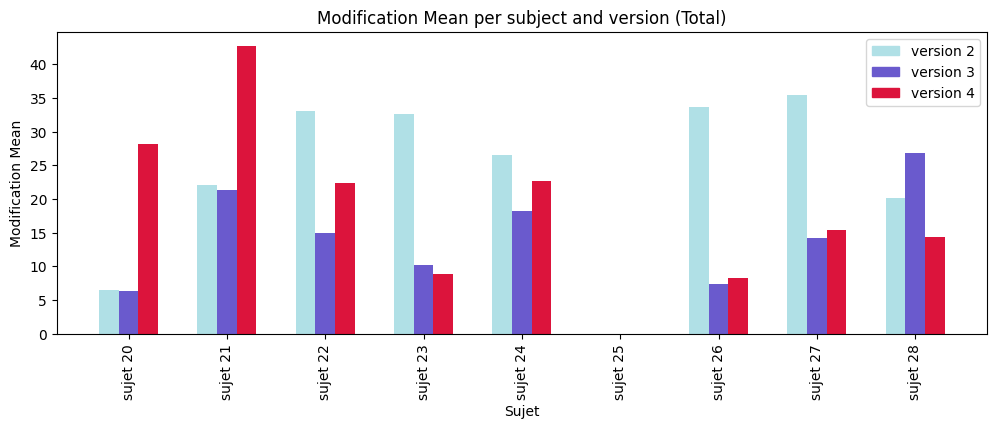

In [ ]:
plotify(sujet_range, y1, "Sujet", "Modification Mean", "Modification Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Modification Mean", "Modification Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Modification Mean", "Modification Mean per subject and version (Total)")

#### std

In [ ]:
y1 = get_columns_indicator(df_indicators, "std", 12)
y2 = get_columns_indicator(df_indicators, "std", 192)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

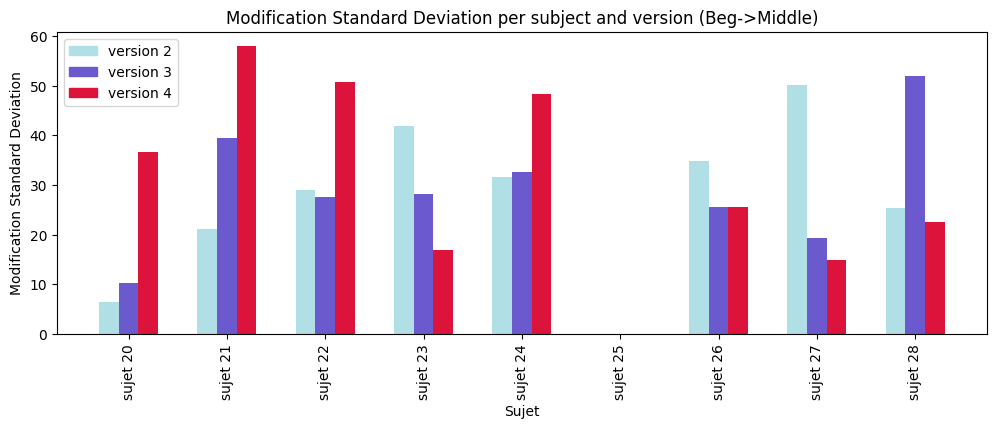

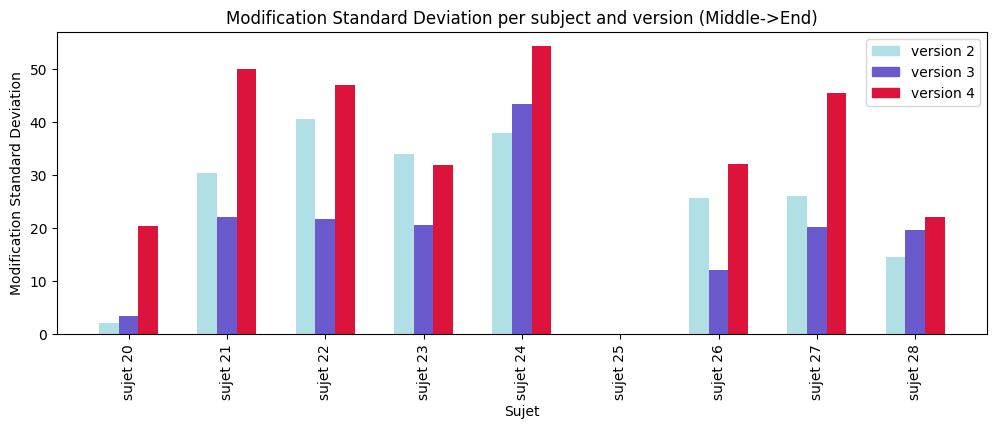

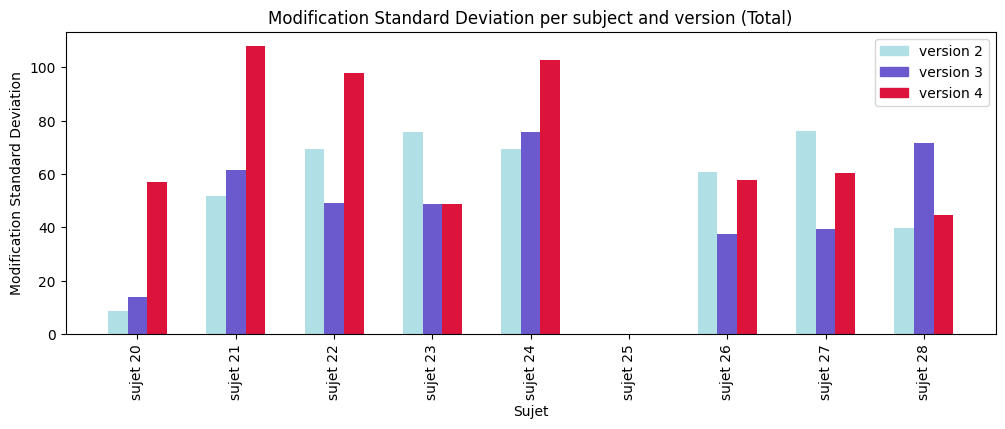

In [ ]:
plotify(sujet_range, y1, "Sujet", "Modification Standard Deviation", "Modification Standard Deviation per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Modification Standard Deviation", "Modification Standard Deviation per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Modification Standard Deviation", "Modification Standard Deviation per subject and version (Total)")

### Pas à Pas

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 13)
y2 = get_columns_indicator(df_indicators, "mean", 193)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

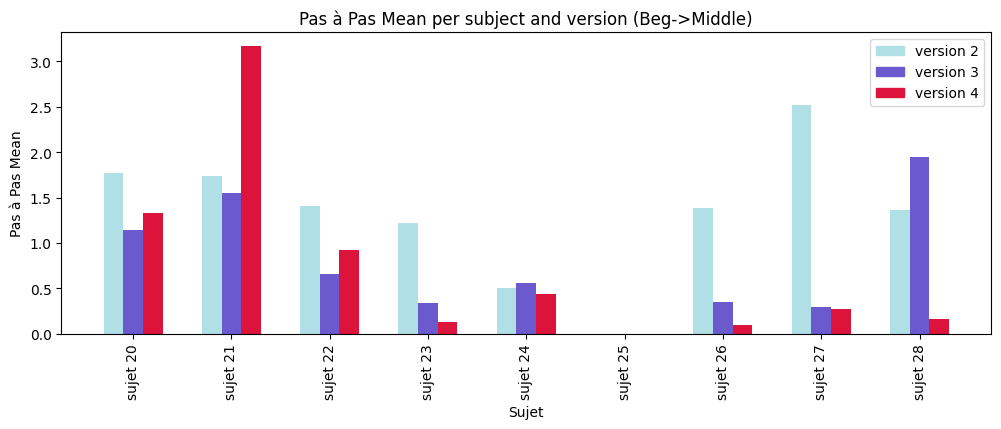

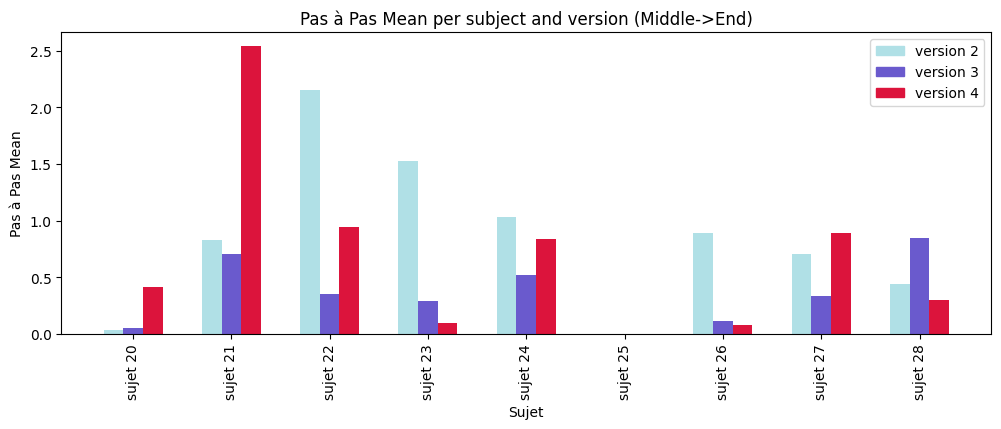

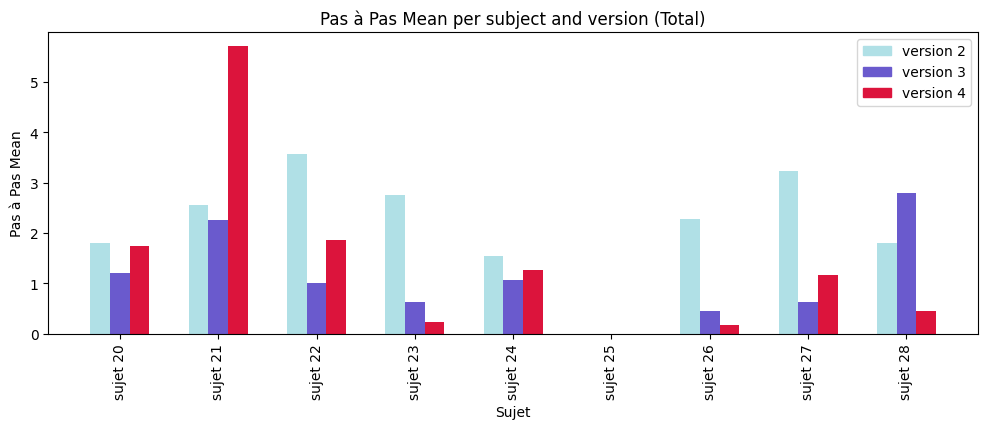

In [ ]:
plotify(sujet_range, y1, "Sujet", "Pas à Pas Mean", "Pas à Pas Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Pas à Pas Mean", "Pas à Pas Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Pas à Pas Mean", "Pas à Pas Mean per subject and version (Total)")

#### Std

In [ ]:
y1 = get_columns_indicator(df_indicators, "std", 13)
y2 = get_columns_indicator(df_indicators, "std", 193)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

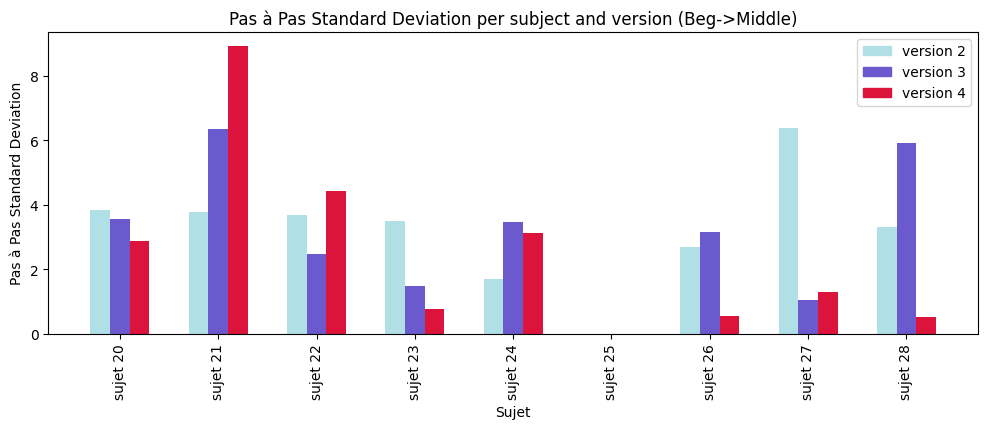

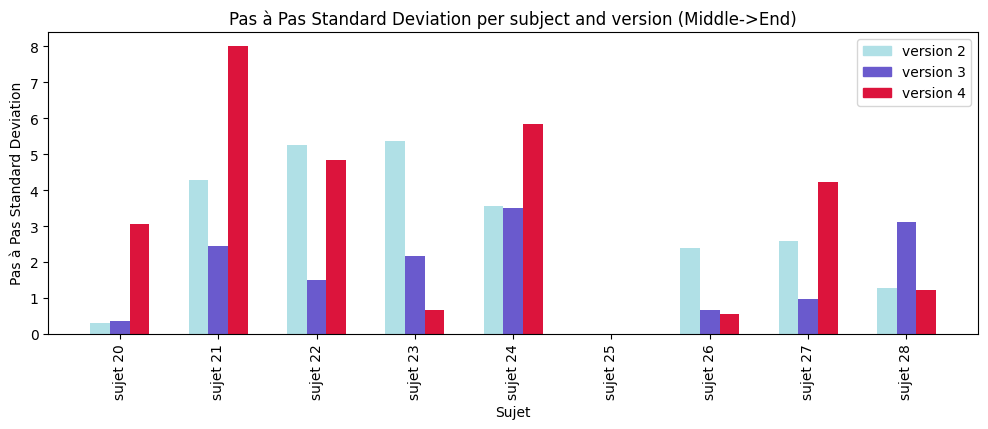

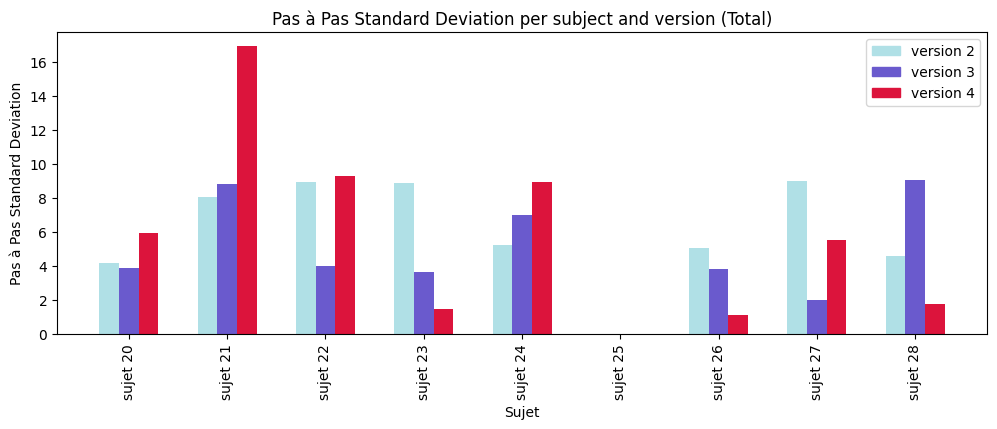

In [ ]:
plotify(sujet_range, y1, "Sujet", "Pas à Pas Standard Deviation", "Pas à Pas Standard Deviation per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Pas à Pas Standard Deviation", "Pas à Pas Standard Deviation per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Pas à Pas Standard Deviation", "Pas à Pas Standard Deviation per subject and version (Total)")

### Help

#### Mean

In [ ]:
y1 = get_columns_indicator(df_indicators, "mean", 14)
y2 = get_columns_indicator(df_indicators, "mean", 194)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

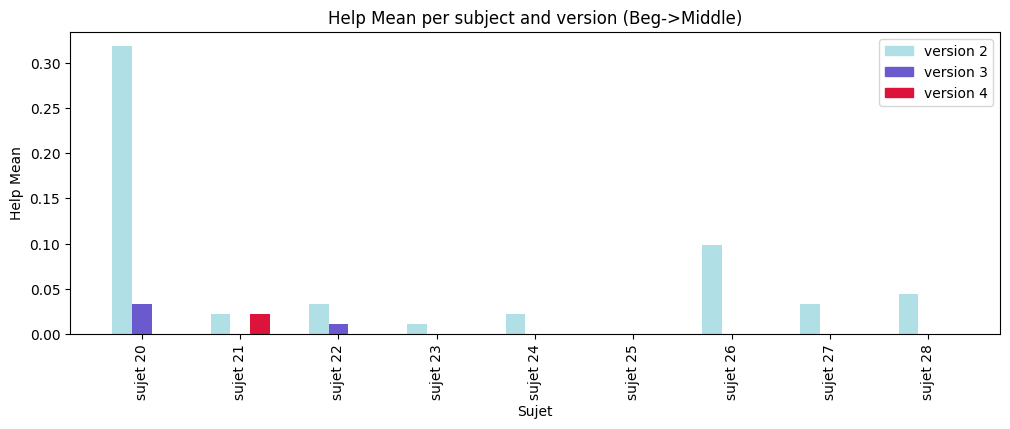

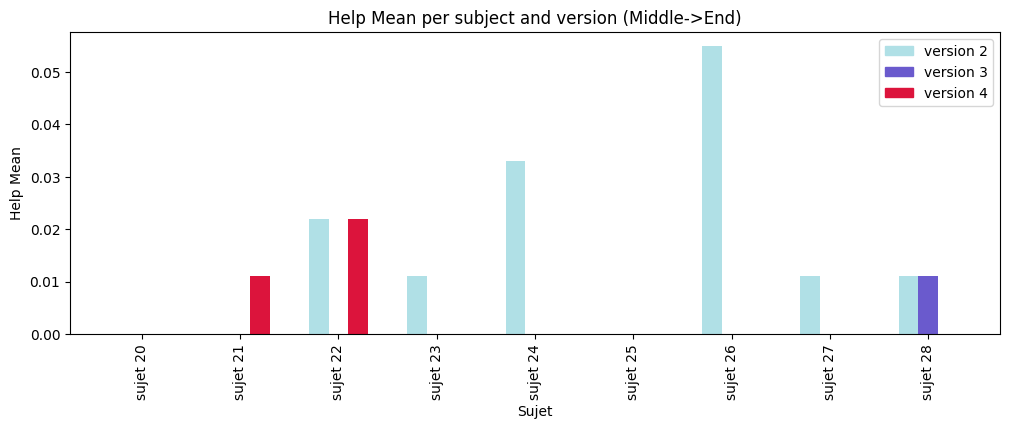

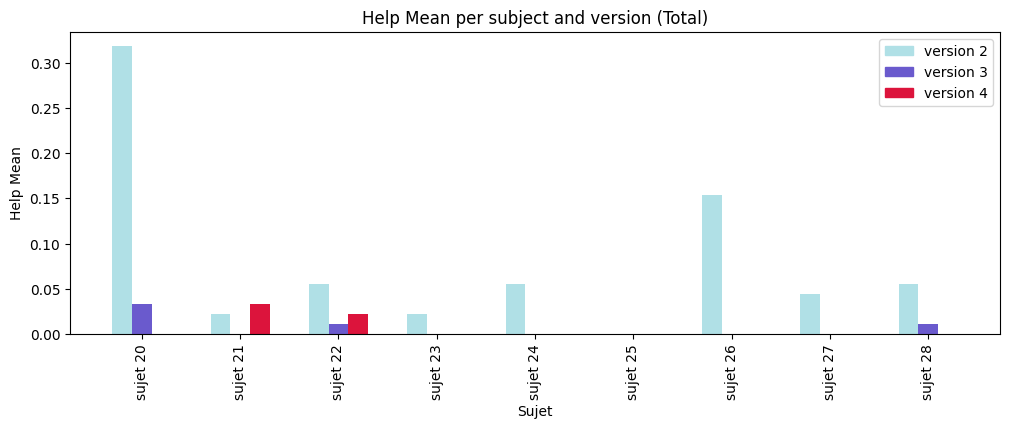

In [ ]:
plotify(sujet_range, y1, "Sujet", "Help Mean", "Help Mean per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Help Mean", "Help Mean per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Help Mean", "Help Mean per subject and version (Total)")

#### std

In [ ]:
y1 = get_columns_indicator(df_indicators, "std", 13)
y2 = get_columns_indicator(df_indicators, "std", 193)
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

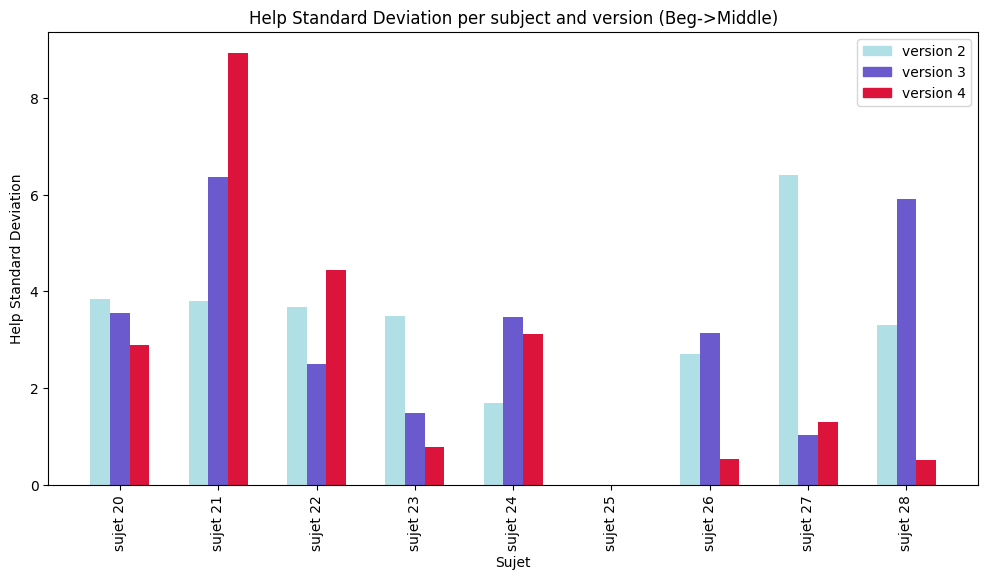

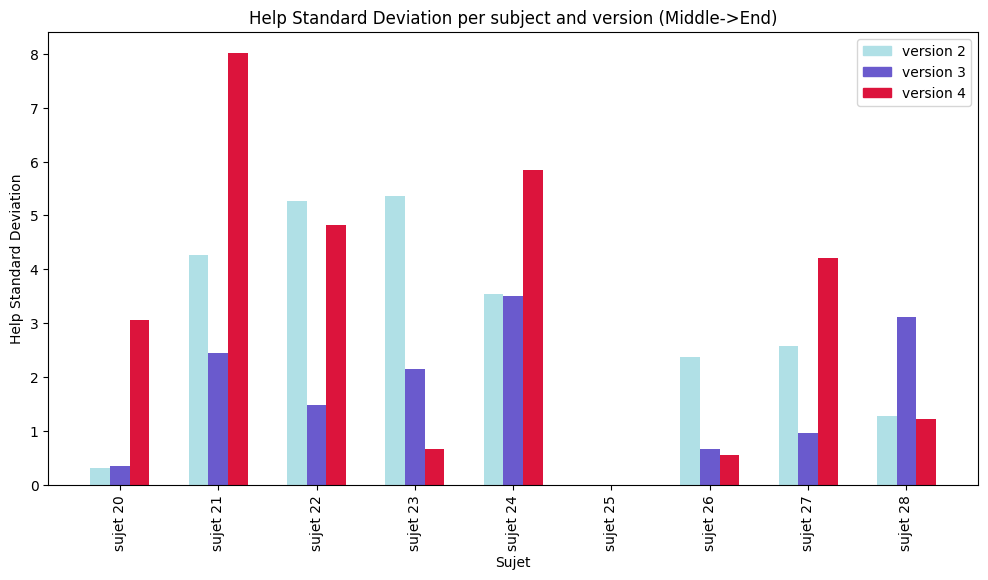

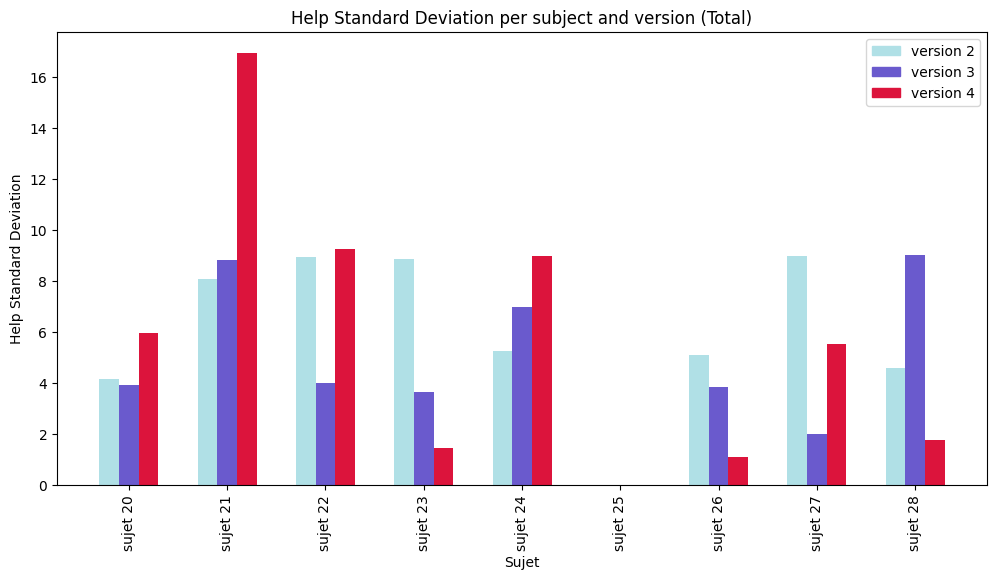

In [ ]:
plotify(sujet_range, y1, "Sujet", "Help Standard Deviation", "Help Standard Deviation per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Help Standard Deviation", "Help Standard Deviation per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Help Standard Deviation", "Help Standard Deviation per subject and version (Total)")

#### Time Mean

In [ ]:
columns_2 = df.columns
beg = 21
y1 = []
for i,sujet in enumerate(sujet_range):
  y1.append([])
  for j,version in enumerate([2,3,4]):
    col = columns_2[beg + i * 25 + j * 8]
    times = list(pd.to_timedelta(df[col]))
    sum_times = timedelta(0)
    for k in range(len(times)):
      sum_times += times[k]
    y1[i].append((sum_times / len(times)).total_seconds())
beg = 255
y2 = []
for i,sujet in enumerate(sujet_range):
  y2.append([])
  for j,version in enumerate([2,3,4]):
    col = columns_2[beg + i * 25 + j * 8]
    times = list(pd.to_timedelta(df[col]))
    sum_times = timedelta(0)
    for k in range(len(times)):
      sum_times += times[k]
    y2[i].append((sum_times / len(times)).total_seconds())
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

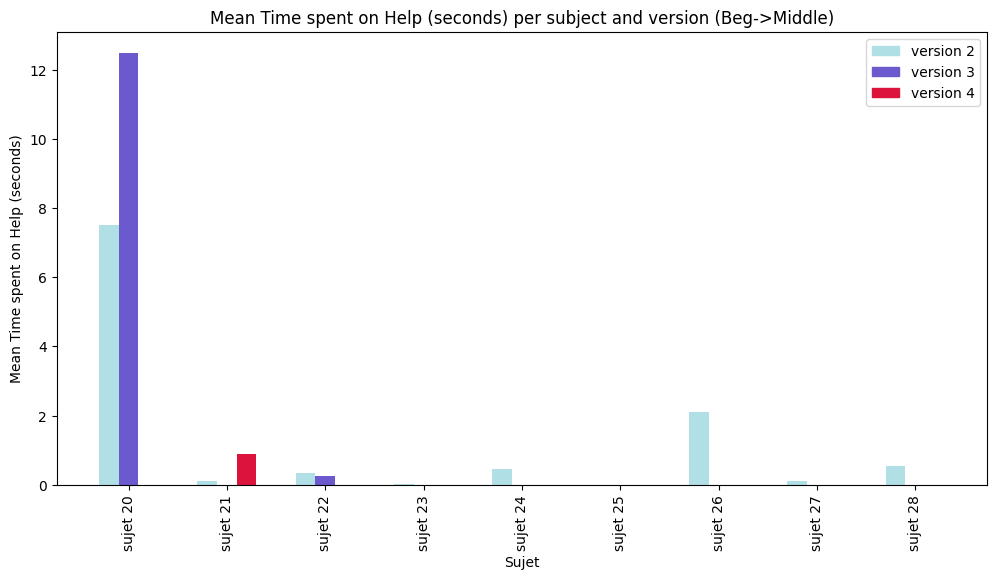

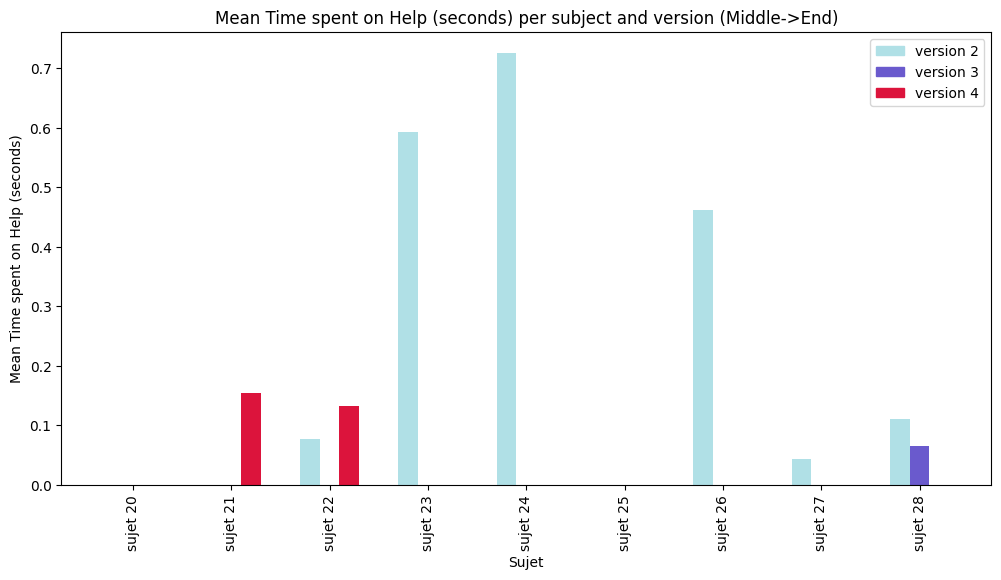

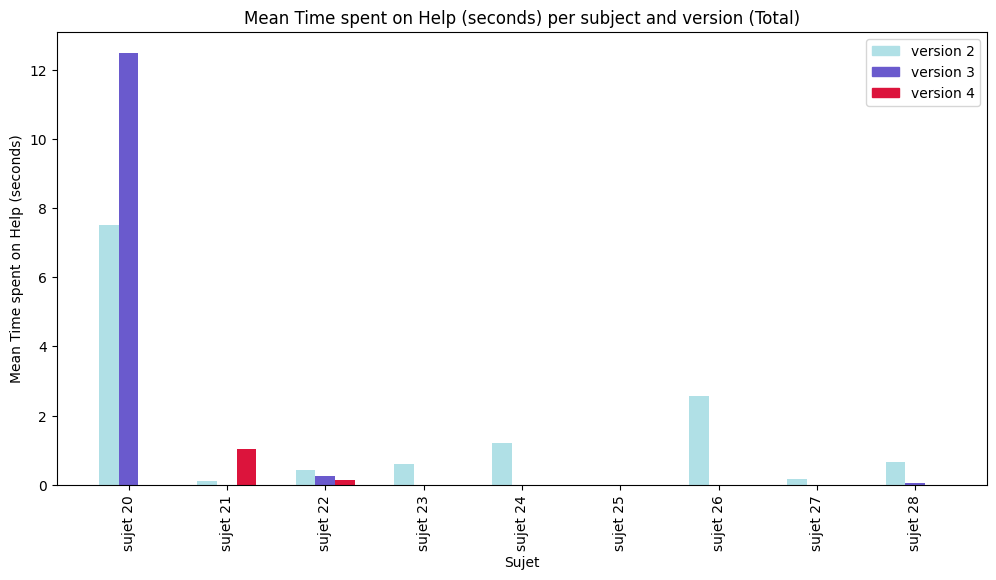

In [ ]:
plotify(sujet_range, y1, "Sujet", "Mean Time spent on Help (seconds)", "Mean Time spent on Help (seconds) per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Mean Time spent on Help (seconds)", "Mean Time spent on Help (seconds) per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Mean Time spent on Help (seconds)", "Mean Time spent on Help (seconds) per subject and version (Total)")

### Time Spent

In [ ]:
columns_2 = df.columns
beg = 22
y1 = []
for i,sujet in enumerate(sujet_range):
  y1.append([])
  for j,version in enumerate([2,3,4]):
    col = columns_2[beg + i * 25 + j * 8]
    times = list(pd.to_timedelta(df[col]))
    sum_times = timedelta(0)
    for k in range(len(times)):
      sum_times += times[k]
    y1[i].append((sum_times / len(times)).total_seconds())
beg = 256
y2 = []
for i,sujet in enumerate(sujet_range):
  y2.append([])
  for j,version in enumerate([2,3,4]):
    col = columns_2[beg + i * 25 + j * 8]
    times = list(pd.to_timedelta(df[col]))
    sum_times = timedelta(0)
    for k in range(len(times)):
      sum_times += times[k]
    y2[i].append((sum_times / len(times)).total_seconds())
y3 = [[y1[i][0]+y2[i][0], y1[i][1]+y2[i][1], y1[i][2]+y2[i][2]] for i in range(len(y1))]

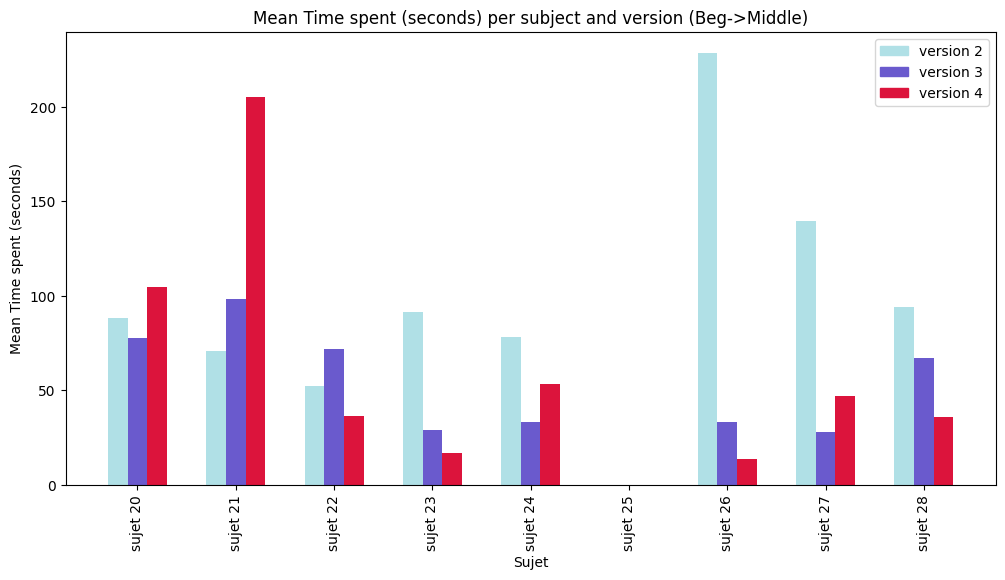

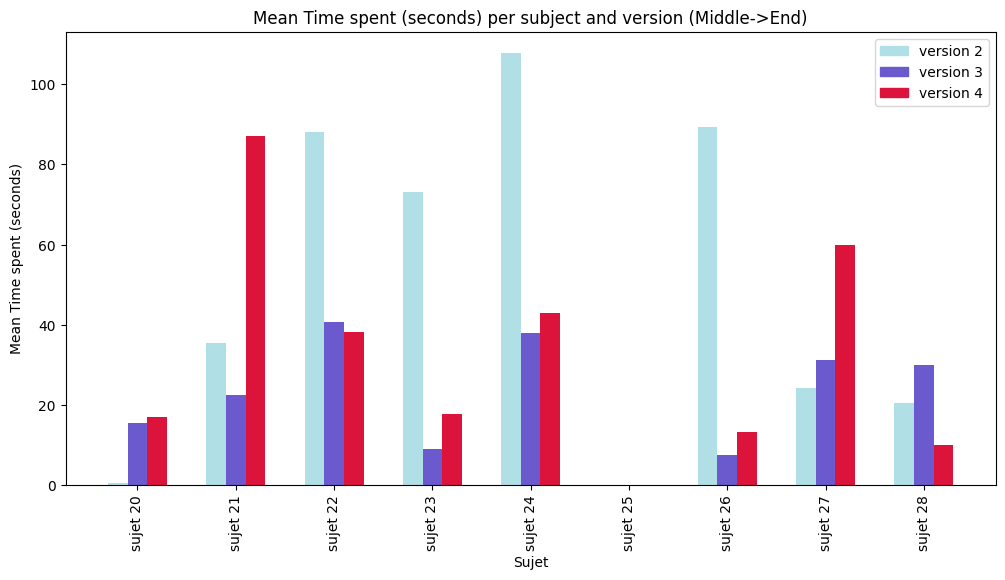

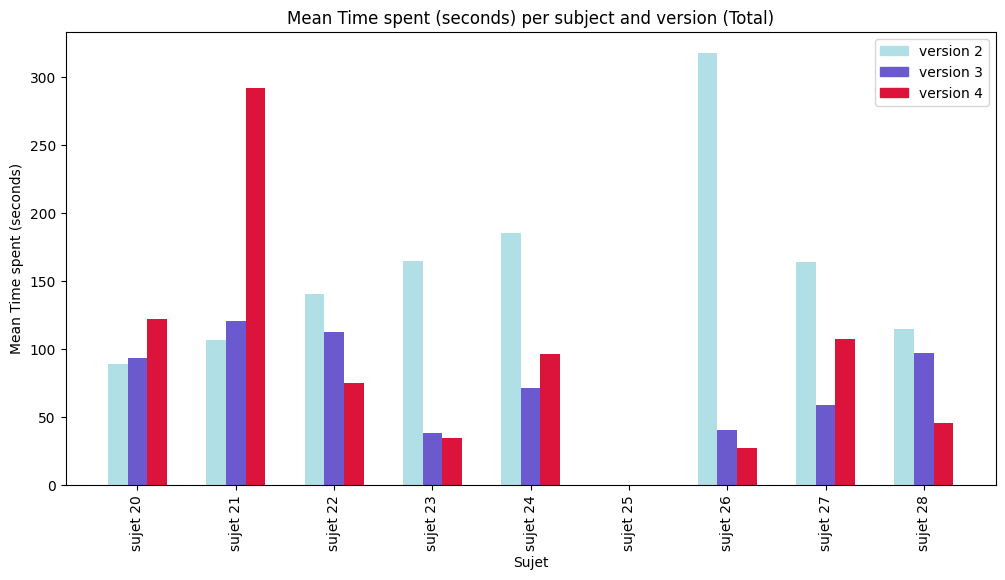

In [ ]:
plotify(sujet_range, y1, "Sujet", "Mean Time spent (seconds)", "Mean Time spent (seconds) per subject and version (Beg->Middle)")
plotify(sujet_range, y2, "Sujet", "Mean Time spent (seconds)", "Mean Time spent (seconds) per subject and version (Middle->End)")
plotify(sujet_range, y3, "Sujet", "Mean Time spent (seconds)", "Mean Time spent (seconds) per subject and version (Total)")